# Experiment A - Kaggle competition with polynomial regression model.
### Thirada Tiamklang 14337188
_18 August 2023_

In this experiment, we will predict the probability of American college players being drafted to join NBA teams' rosters. We will use a polynomial regression model and compare it to a baseline model to aid in predicting the target outcome. 

__Table of contents__
1. Load and explore dataset
2. Visualisation
3. Pre-processing data
4. Split data
5. Baseline model
6. Polynomial regression model
7. Predict prob on Test Dataset

## 1. Load and explore dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/train.csv')

/var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/ipykernel_50564/4229903785.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/train.csv')


In [4]:
test = pd.read_csv('../data/raw/test.csv')

In [5]:
df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [6]:
df.shape

(56091, 64)

In [7]:
test.shape

(4970, 63)

There are 64 features/columns with 56,091 rows on df Dataset while there is no target(drafted) feature on test dataset.

In [8]:
df.columns

Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')

The objective of the experiment focusing on player_id and drafted features, with drafted feature as a target variable.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

It can be seen that there are 57 numeric variables and 7 categorical variables. With 33 features that have missing values.

In [10]:
df.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,56091,56091,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,...,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091,56091.000000
unique,358,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23929,NaN
top,Army,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06dc8dc2-888e-4941-9106-4798cddfb9d2,NaN
freq,209,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,...,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,NaN,0.009556
std,NaN,NaN,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,...,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,NaN,0.097287
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,...,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,NaN,0.000000
50%,NaN,NaN,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,...,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,NaN,0.000000
75%,NaN,NaN,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,...,1.066415,1.111100,2.758600,3.833300,1.533300,0.793100,0.366700,9.069000,NaN,0.000000


## 2. Visaulisation

__The bar chart of the target feature, drafted, represents whether the players are drafted or not.__

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

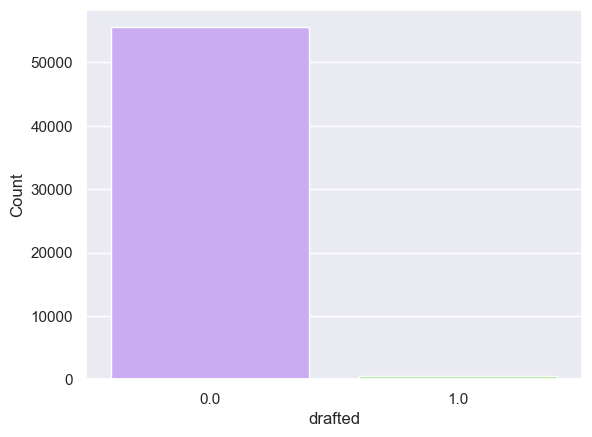

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="drafted", data=df, palette=sns.xkcd_palette(["pastel purple", "light green"]))
plt.xlabel('drafted')
plt.ylabel('Count')
plt.show()

In [13]:
df['drafted'].sum()

536.0

It can be seen obviously that the the target variable, drafted, is imbalanced. In this case, we have a significantly higher number of players who are not drafted compared to those that are drafted. This can lead to a bias in the model towards predicting that a player is not drafted. We may use the Over-sampling Technique (SMOTE) to address this issue.

## 3. Pre-processing data

### 3.1 Check NA and duplicate

In [14]:
missing_value_counts = df.isnull().sum()

In [15]:
sorted_missing_values = missing_value_counts.sort_values(ascending=False)
print(sorted_missing_values)

pick           54705
Rec_Rank       39055
dunks_ratio    30793
mid_ratio       9688
rim_ratio       9464
               ...  
porpag             0
adjoe              0
pfr                0
year               0
drafted            0
Length: 64, dtype: int64


After sorting all the features, 'pick,' 'Rec_rank,' and 'dunks_ratio' have a high number of missing values, which is above 10k. We will drop these variables since they could potentially lead to inaccurate outcomes. However, dunks_ratio seems to be significant for the player to be drafted. There are some pattern to be relevant to this feature.

### 3.2 Missing value pattern

It can be seen that some groups of features shared the same amount of NA. We will see it by the heatmap of missing values below.

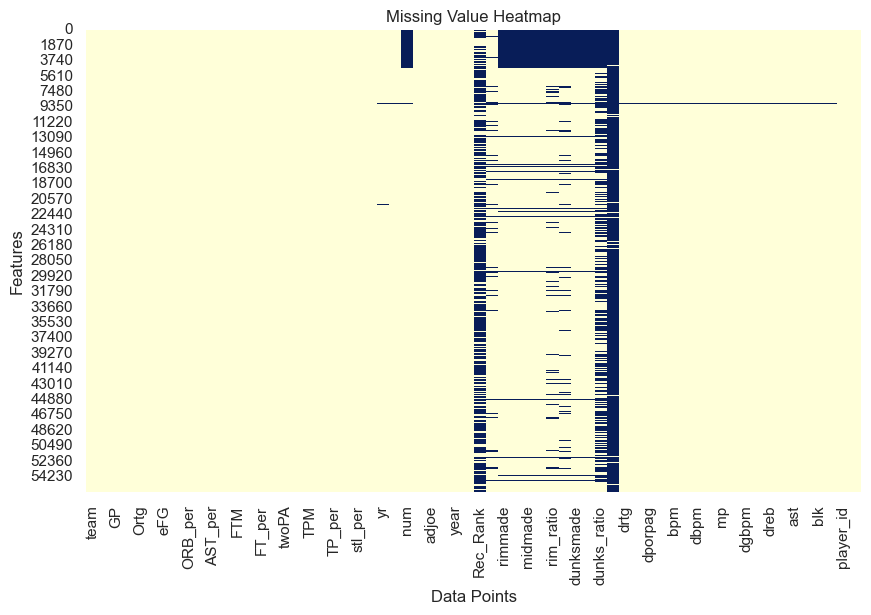

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame containing missing value information
missing_data = df.isnull()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cmap="YlGnBu", cbar=False)
plt.title("Missing Value Heatmap")
plt.xlabel("Data Points")
plt.ylabel("Features")
plt.show()

It's evident that 'rimmade,' 'rimmade_rimmiss,' 'midmade,' 'midmade_midmiss,' 'dunksmade,' and 'dunksmiss_dunksmade' share the same number of missing values. This is because the data contained in these features starts from the season year 2010. We will replace the NA by 0.

__Let's take a look into dunks_raio__

In [17]:
# Display example rows for 'dunksmade', 'dunksmiss_dunksmade', and 'dunks_ratio'
example_rows = df[['dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio']].sample(5)
print(example_rows)

       dunksmade  dunksmiss_dunksmade  dunks_ratio
9787         1.0                  2.0          0.5
5440         0.0                  0.0          NaN
53098        1.0                  1.0          1.0
7213         0.0                  1.0          0.0
36577        0.0                  0.0          NaN


It's evident that the reason 'dunks_ratio' is NA is because both 'dunksmade' and 'dunksmiss_dunksmade' are either 0 or NA. This situation can be addressed by filling with 0.

### 3.3 Clean data

In [18]:
df_cleaned = df.copy()

In [19]:
test_cleaned = test.copy()

__Drop features that have NA more than 10k.__

In [20]:
# Drop the specified columns
columns_to_drop = ['pick', 'Rec_Rank']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, axis=1)

In [21]:
test_cleaned = test_cleaned.drop(columns=columns_to_drop, axis=1)

__Replace the NA by zero__

In [22]:
# List of columns to replace missing values with 0
columns_to_replace = ['rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
                      'dunksmade', 'dunksmiss_dunksmade', 'rim_ratio', 'mid_ratio', 'dunks_ratio']

# Replace missing values with 0 in the specified columns
df_cleaned[columns_to_replace] = df_cleaned[columns_to_replace].fillna(0)


In [23]:
test_cleaned[columns_to_replace] = test_cleaned[columns_to_replace].fillna(0)

In [24]:
# Get the list of features with missing values
features_with_missing = df_cleaned.columns[df_cleaned.isnull().any()].tolist()

# Print the features with missing values and the number of missing values for each
print("Features with missing values:")
for feature in features_with_missing:
    num_missing = df_cleaned[feature].isnull().sum()
    print(f"Feature: {feature}, Number of missing values: {num_missing}")


Features with missing values:
Feature: yr, Number of missing values: 274
Feature: ht, Number of missing values: 80
Feature: num, Number of missing values: 4669
Feature: ast_tov, Number of missing values: 4190
Feature: drtg, Number of missing values: 44
Feature: adrtg, Number of missing values: 44
Feature: dporpag, Number of missing values: 44
Feature: stops, Number of missing values: 44
Feature: bpm, Number of missing values: 44
Feature: obpm, Number of missing values: 44
Feature: dbpm, Number of missing values: 44
Feature: gbpm, Number of missing values: 44
Feature: mp, Number of missing values: 38
Feature: ogbpm, Number of missing values: 44
Feature: dgbpm, Number of missing values: 44
Feature: oreb, Number of missing values: 38
Feature: dreb, Number of missing values: 38
Feature: treb, Number of missing values: 38
Feature: ast, Number of missing values: 38
Feature: stl, Number of missing values: 38
Feature: blk, Number of missing values: 38
Feature: pts, Number of missing values: 38

"The 'num' feature represents the player's number. Cases where players share the same number could occur.

In [25]:
# Group by 'num' and 'player_id', then count the unique players in each group
grouped = df_cleaned.groupby(['num', 'player_id'])['player_id'].nunique()

# Filter groups where more than one player shares the same number
groups_with_multiple_players = grouped[grouped > 1]

# Print the groups where multiple players share the same number
print("Groups where multiple players share the same number:")
print(groups_with_multiple_players)


Groups where multiple players share the same number:
Series([], Name: player_id, dtype: int64)


The 'ht' represents the height of student. However, the data are showed as the datetime/object. we will also drop this feature.

__Drop the feature which is not relevant with target__

In [26]:
# Drop the 'num' feature from the DataFrame
df_cleaned = df_cleaned.drop(columns=['num','ht'])

In [27]:
test_cleaned = test_cleaned.drop(columns=['num','ht'])

__Replace numeric by mean and categorical by mode__

In [28]:
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_cleaned.select_dtypes(include=[np.object]).columns.tolist()

# Replace missing values with mean for numeric columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Replace missing values with mode for categorical columns
for col in categorical_columns:
    mode_val = df_cleaned[col].mode().iloc[0]
    df_cleaned[col].fillna(mode_val, inplace=True)


/var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/ipykernel_50564/1933843988.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = df_cleaned.select_dtypes(include=[np.object]).columns.tolist()


In [29]:
numeric_columns = test_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = test_cleaned.select_dtypes(include=[np.object]).columns.tolist()

# Replace missing values with mean for numeric columns
test_cleaned[numeric_columns] = test_cleaned[numeric_columns].fillna(test_cleaned[numeric_columns].mean())

# Replace missing values with mode for categorical columns
for col in categorical_columns:
    mode_val = test_cleaned[col].mode().iloc[0]
    test_cleaned[col].fillna(mode_val, inplace=True)


/var/folders/sb/nxrzyd0n61192x17k7wcyr4w0000gn/T/ipykernel_50564/2376070461.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = test_cleaned.select_dtypes(include=[np.object]).columns.tolist()


In [30]:
print(df_cleaned.isnull().sum())

team                   0
conf                   0
GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
yr                     0
porpag                 0
adjoe                  0
pfr                    0
year                   0
type                   0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
dunks_ratio            0


Now there is no missing value in the dataset.

In [31]:
print(test_cleaned.isnull().sum())

team                   0
conf                   0
GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
yr                     0
porpag                 0
adjoe                  0
pfr                    0
year                   0
type                   0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
dunks_ratio            0


In [32]:
# Save the df_cleaned DataFrame as a CSV file
df_cleaned.to_csv('../data/processed/cleaned.csv', index=False)
test_cleaned.to_csv('../data/processed/test_cleaned.csv', index=False)

### 3.4 Feature engineering

In [33]:
target = df_cleaned.pop('drafted')

In [34]:
#define numeric and categorical columns
num_cols = list(df_cleaned.select_dtypes('number').columns)
cat_cols = list(set(df_cleaned.columns) - set(num_cols))

In [35]:
# for test dataset
num_test = list(test_cleaned.select_dtypes('number').columns)
cat_test = list(set(test_cleaned.columns) - set(num_test))

__Encoding categorical data__

In [36]:
for col in cat_cols:
    num_unique = df_cleaned[col].nunique()
    print(f"Column '{col}' has {num_unique} unique values.")

# Decide which encoding method to use based on the number of unique values
    if num_unique <= 10:
        print(f"Using one-hot encoding for '{col}'.")
    else:
        print(f"Using label encoding for '{col}'.")


Column 'yr' has 8 unique values.
Using one-hot encoding for 'yr'.
Column 'type' has 1 unique values.
Using one-hot encoding for 'type'.
Column 'team' has 358 unique values.
Using label encoding for 'team'.
Column 'player_id' has 23929 unique values.
Using label encoding for 'player_id'.
Column 'conf' has 36 unique values.
Using label encoding for 'conf'.


Since there are three features that should use label encoding, we will perform label encoding for all columns.

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [38]:
features = pd.DataFrame(df_cleaned)

In [39]:
features_test = pd.DataFrame(test_cleaned)

In [40]:
le = LabelEncoder()

In [41]:
for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [42]:
for col in cat_test:
    test_cleaned[col] = le.fit_transform(test_cleaned[col])

In [43]:
print(features)

       team  conf  GP  Min_per   Ortg   usg    eFG  TS_per  ORB_per  DRB_per  \
0       267    27  26     29.5   97.3  16.6   42.5   44.43      1.6      4.6   
1       327    33  34     60.9  108.3  14.9   52.4   54.48      3.8      6.3   
2       272     7  27     72.0   96.2  21.8   45.7   47.98      2.1      8.0   
3       231    34  30     44.5   97.7  16.0   53.6   53.69      4.1      9.4   
4       228    10  33     56.2   96.5  22.0   52.8   54.31      8.3     18.6   
...     ...   ...  ..      ...    ...   ...    ...     ...      ...      ...   
56086   198    17   1      0.1    0.0  48.9    0.0    0.00      0.0      0.0   
56087   217    31   1      0.2  206.9  35.9  100.0  102.56      0.0      0.0   
56088   297    30   1      0.6   48.5  28.9    0.0   52.63      0.0     15.9   
56089   332    29   1      0.1  300.0  20.0  150.0  150.00      0.0      0.0   
56090    50    33  19     21.9   55.0  16.4   24.5   30.60      0.6      7.2   

       ...      ogbpm      dgbpm    ore

__Scale data__

In [44]:
scaler = StandardScaler()
features[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [45]:
features_test[num_test] = scaler.fit_transform(test_cleaned[num_test])

__save files__

In [46]:
from joblib import dump

In [47]:
dump(le, '../models/le.joblib')
dump(scaler, '../models/scaler.joblib')

In [48]:
features.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,267,27,0.256483,-0.278858,0.178191,-0.249703,-0.113954,-0.186453,-0.419337,-0.742206,...,-0.112904,-0.457229,-0.782939,-0.863766,-0.883918,0.101869,-0.390787,-0.585056,-0.381822,11624
1,327,33,1.049311,0.840106,0.538392,-0.523700,0.429595,0.390670,-0.187273,-0.585927,...,0.328251,0.059291,-0.127411,-0.424644,-0.343945,0.641015,-0.250912,-0.113802,0.033485,9244
2,272,7,0.355586,1.235664,0.142171,0.588408,0.061739,0.017407,-0.366595,-0.429648,...,0.586909,-0.134487,-0.190906,0.298050,0.142815,0.760170,-0.102295,-0.677248,1.294390,22465
3,231,34,0.652897,0.255679,0.191290,-0.346408,0.495479,0.345304,-0.155628,-0.300948,...,0.281301,0.014898,-0.095596,-0.310620,-0.252434,0.023030,0.079373,-0.358049,-0.170049,1995
4,228,10,0.950208,0.672618,0.151995,0.620643,0.451556,0.380908,0.287403,0.544795,...,0.064405,-0.068948,0.884853,0.953859,0.983285,-0.191791,-0.159865,0.120868,0.363574,15559


In [2]:
features_test.head()

NameError: name 'features_test' is not defined

In [1]:
features_test.to_csv('../data/processed/test_features_cleaned.csv', index=False)

NameError: name 'features_test' is not defined

### 3.5 Synthetic Minority Over-sampling Technique (SMOTE)

We will handle the imbalanced data by SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
X = features
y = target

# Apply SMOTE oversampling to balance the target variable
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Check the new balance of the target variable
print(y.value_counts())

0.0    55555
1.0    55555
Name: drafted, dtype: int64


Now the data is balanced.

## 4. Split data

In [51]:
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(features, target, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

In [52]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(35897, 59)
(8975, 59)
(11219, 59)


In [53]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35897,)
(8975,)
(11219,)


In [54]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

## 5. Features selection

To ensures that the feature selection process remains consistent across different experiments, we will select features for this experiment in this step.

__Random Forest__

In [55]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on your data
random_forest.fit(X, y)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Set a threshold for feature selection
importance_threshold = 0.01 

# Select features with importance above the threshold
selected_features_indices = np.where(feature_importances > importance_threshold)[0]
selected_feature_names = X.columns[selected_features_indices]

print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['FTM', 'twoPM', 'twoPA', 'porpag', 'adjoe', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'adrtg', 'dporpag', 'stops',
       'bpm', 'obpm', 'gbpm', 'mp', 'ogbpm', 'dreb', 'treb', 'pts'],
      dtype='object')


In [56]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


selected_feature_names = ['FTM', 'twoPM', 'twoPA', 'porpag', 'adjoe', 'rimmade', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'adrtg', 'dporpag', 'stops',
       'bpm', 'obpm', 'gbpm', 'mp', 'ogbpm', 'dreb', 'treb', 'pts']

# Create 'newX' DataFrame containing only the selected features
newX = X[selected_feature_names]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = newX.columns
vif_data["VIF"] = [variance_inflation_factor(newX.values, i) for i in range(newX.shape[1])]

print(vif_data)


                feature         VIF
0                   FTM   13.386173
1                 twoPM  121.720782
2                 twoPA  107.324844
3                porpag   30.563470
4                 adjoe    6.947276
5               rimmade    9.124043
6             dunksmade  346.559514
7   dunksmiss_dunksmade  342.045814
8           dunks_ratio    2.400474
9                 adrtg    7.456121
10              dporpag   34.943116
11                stops   34.832249
12                  bpm   27.028470
13                 obpm   26.841381
14                 gbpm   42.452180
15                   mp   26.140134
16                ogbpm   44.055441
17                 dreb   61.698074
18                 treb   55.020291
19                  pts   47.044956


The VIF value well above 5 represents that there is high multicollinearity. Therefore, we will select only __adjoe, rimmade, dunks_ratio, and adrtg__ to train the model.

In [57]:
features_to_keep = ['adjoe', 'rimmade', 'dunks_ratio', 'adrtg']

# Create new feature sets with selected features for training, validation, and testing
newX_train = X_train[features_to_keep]
newX_val = X_val[features_to_keep]
newX_test = X_test[features_to_keep]

In [58]:
print(newX_train.shape)
print(newX_val.shape)
print(newX_test.shape)

(35897, 4)
(8975, 4)
(11219, 4)


## 5. Baseline model

In [59]:
pred_value = y_train.mode()
print(pred_value)

0    0.0
Name: drafted, dtype: float64


In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score

# Create a NumPy array filled with the predicted baseline values
y_base = np.full((len(y_train), 1), pred_value)

# Compute metrics for baseline model
mse_baseline = mean_squared_error(y_train, y_base)
mae_baseline = mean_absolute_error(y_train, y_base)
auroc_baseline = roc_auc_score(y_train, y_base)

# Print the results
print("Baseline Model:")
print("Predicted value:", pred_value)
print("Mean Squared Error (MSE):", mse_baseline)
print("Mean Absolute Error (MAE):", mae_baseline)
print("AUROC:", auroc_baseline)


Baseline Model:
Predicted value: 0    0.0
Name: drafted, dtype: float64
Mean Squared Error (MSE): 0.010000835724433797
Mean Absolute Error (MAE): 0.010000835724433797
AUROC: 0.5


## 6. Polynomial Regression model

__train model on trainning set__

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
newX_train_poly = poly_features.fit_transform(newX_train)

In [62]:
# transformation on X_val and X_test
newX_val = poly_features.transform(newX_val)
newX_test = poly_features.transform(newX_test)

In [63]:
from sklearn.linear_model import LogisticRegression
poly_model = LogisticRegression()

In [64]:
# fit model
poly_model.fit(newX_train_poly, y_train)

/Users/thiradatiamklang/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# dump the fitted model
#dump(poly_model,  '../models/log_poly_2.joblib')

In [66]:
# save prediction 
y_train_preds = poly_model.predict_proba(newX_train_poly)[:, 1]

In [67]:
print(mean_squared_error(y_train, y_train_preds, squared=False))
print(mean_absolute_error(y_train, y_train_preds))
print(roc_auc_score(y_train, y_train_preds))

0.08935380440930576
0.01590011833133156
0.9718561683981886


__Validation set__

In [68]:
y_val_preds = poly_model.predict_proba(newX_val)[:, 1]
print(mean_squared_error(y_val_preds, y_val, squared=False))
print(mean_absolute_error(y_val_preds, y_val))
print(roc_auc_score(y_val, y_val_preds))

0.09116067961846476
0.01623142059257381
0.970257766795252


__Testing set__

In [69]:
y_test_preds = poly_model.predict_proba(newX_test)[:, 1]
print(mean_squared_error(y_test_preds, y_test, squared=False))
print(mean_absolute_error(y_test_preds, y_test))
print(roc_auc_score(y_test, y_test_preds))

0.07786434218197587
0.01338039465714879
0.9791487117335488


It can be seen that the AUROC score after trained model with polynomial regression increased compared to baseline model.

## 7.Predict probablity on Test Dataset

We will use the trained model in df dataset to predict the probability of drafted in the test dataset.

In [70]:
# select features the same as Train dataset
features_to_keep = ['adjoe', 'rimmade', 'dunks_ratio', 'adrtg']
X_testdataset = features_test[features_to_keep]

In [71]:
X_testdataset.head()

,adjoe,rimmade,dunks_ratio,adrtg
0,0.135376,-0.850756,-0.852964,0.804933
1,-0.826179,-0.761721,-0.852964,1.320875
2,0.187632,0.306707,1.125226,0.282413
3,0.430469,-0.850756,-0.852964,-0.738868
4,0.685925,-0.227507,-0.852964,0.153651


In [72]:
# Use trained models to predict probability on Dataset B
X_testdataset_poly = poly_features.transform(X_testdataset)
drafted_probability_poly = poly_model.predict_proba(X_testdataset_poly)[:, 1]

In [73]:
results_A = pd.DataFrame({'drafted': drafted_probability_poly})

In [75]:
results_A['player_id'] = test['player_id']
results_A = results_A[['player_id', 'drafted']]
print(results_A)

                                 player_id       drafted
0     cf302b4d-84f7-4124-a25d-a75eed31978b  8.940124e-06
1     f91837cd-4f49-4b70-963d-aeb82c6ce3da  3.103699e-09
2     53ec2a29-1e7d-4c6d-86d7-d60d02af8916  1.559228e-04
3     32402798-471c-4a54-8cb4-29cd95199014  2.349645e-03
4     73b960f9-27b8-4431-9d23-a760e9bbc360  8.587857e-04
...                                    ...           ...
4965  a25ee55f-02a3-4f8e-8194-a5f427e14e7c  6.526613e-04
4966  d0d9f45e-7b01-44b3-8d40-514ec338611d  4.454578e-15
4967  f8df22c4-1602-4fab-896d-8820951aae2f  2.920054e-15
4968  b791c69a-f769-4163-afda-051a6fd20a9d  5.298693e-15
4969  18b51f5d-4746-4121-88fd-c8d0a1399130  9.441007e-04

[4970 rows x 2 columns]


In [76]:
results_A.to_csv('../data/processed/results_A.csv', index=False)

## 8. References

So, A. (2023). _36120_AdvMLA-Lab1_Exercise2-Solutions.ipynb_. https://colab.research.google.com/drive/15OZMUMwUBoAmtrfuzJaEhF1Ta8XkCmQZ?authuser=1#scrollTo=Pw_LqGuGC9Oz

So, A. (2023). _36120_AdvMLA-Lab1_Exercise3-Solutions.ipynb_. https://colab.research.google.com/drive/1sHbkg8n7cU_GSm4AB7oKKIzFjJvobBxK?authuser=1#scrollTo=Bc10AnKyW23U